# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

In [15]:
df_mcu = pd.read_csv('Marvel_Movies.csv')
df_mcu

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6
5,5,The Avengers,Joss Whedon,NaN,2012-05-04 00:00:00,8.0,69,91,91,3.7,A+,225.0,623.4,1521.0
6,6,Iron Man 3,Shane Black,NaN,2013-05-03 00:00:00,7.1,62,79,78,3.0,A,200.0,409.0,1215.0
7,7,Thor: The Dark World,Alan Taylor,NaN,2013-11-08 00:00:00,6.7,54,67,75,2.2,A-,272.0,206.4,644.8
8,8,Captain America: The Winter Soldier,Anthony Russo,Joe Russo,2014-04-04 00:00:00,7.7,70,90,92,3.7,A,177.0,259.8,714.4
9,9,Guardians of the Galaxy,James Gunn,NaN,2014-08-01 00:00:00,8.0,76,92,92,3.8,A,196.0,333.7,773.4


## Checking Data Frame

In [18]:
df_mcu.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6


In [21]:
df_mcu.tail()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
29,29,Black Panther: Wakanda Forever,Ryan Coogler,NaN,2022-11-11 00:00:00,6.7,67,84,94,3.3,A,250.0,453.8,859.2
30,30,Ant-Man and the Wasp: Quantumania,Peyton Reed,NaN,2023-02-17 00:00:00,5.5,48,46,82,2.2,B,330.0,214.5,476.1
31,31,Guardians of the Galazy Vol. 3,James Gunn,NaN,2023-05-05 00:00:00,6.0,64,82,94,4.0,A,250.0,358.9,845.6
32,32,The Marvels,Nia DaCosta,NaN,2023-11-10 00:00:00,7.9,50,62,81,2.6,B,219.8,84.5,206.1
33,33,Deadpool & Wolverine,Shawn Levy,NaN,2024-07-26 00:00:00,7.8,56,78,94,3.6,A,200.0,636.7,1338.0


In [23]:
df_mcu.shape

(34, 14)

In [25]:
df_mcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Index                                            34 non-null     int64  
 1   Title                                            34 non-null     object 
 2   Director (1)                                     34 non-null     object 
 3   Director (2)                                     5 non-null      object 
 4   Release Date (DD-MM-YYYY)                        34 non-null     object 
 5   IMDb (scored out of 10)                          34 non-null     float64
 6   IMDB Metascore (scored out of 100)               34 non-null     int64  
 7   Rotten Tomatoes - Critics (scored out of 100%)   34 non-null     int64  
 8   Rotten Tomatoes - Audience (scored out of 100%)  34 non-null     int64  
 9   Letterboxd (scored out of 5)      

In [27]:
df_mcu.sample()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8


In [29]:
df_mcu.describe()

,Index,IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.500000,7.244118,65.970588,80.882353,84.205882,3.235294,229.523529,365.864706,918.564706
std,9.958246,0.692029,8.857407,12.727362,10.446920,0.519255,69.004243,195.486792,556.262323
min,0.000000,5.500000,48.000000,46.000000,45.000000,2.200000,140.000000,84.500000,206.100000
25%,8.250000,6.825000,60.250000,76.250000,78.250000,2.900000,183.750000,215.025000,535.925000
50%,16.500000,7.300000,67.000000,83.500000,86.500000,3.350000,200.000000,333.950000,809.500000
75%,24.750000,7.800000,71.000000,91.000000,91.750000,3.700000,250.000000,422.925000,1149.500000
max,33.000000,8.400000,88.000000,96.000000,98.000000,4.000000,400.000000,858.400000,2799.000000


In [31]:
df_mcu.describe(include='object').T

,count,unique,top,freq
Title,34,34,Iron Man,1
Director (1),34,21,Anthony Russo,4
Director (2),5,2,Joe Russo,4
Release Date (DD-MM-YYYY),34,34,2008-05-02 00:00:00,1
CinemaScore (grades A+ to F),34,5,A,19


In [35]:
df_mcu.dtypes

Index                                                int64
Title                                               object
Director (1)                                        object
Director (2)                                        object
Release Date (DD-MM-YYYY)                           object
IMDb (scored out of 10)                            float64
IMDB Metascore (scored out of 100)                   int64
Rotten Tomatoes - Critics (scored out of 100%)       int64
Rotten Tomatoes - Audience (scored out of 100%)      int64
Letterboxd (scored out of 5)                       float64
CinemaScore (grades A+ to F)                        object
Budget (in million $)                              float64
Domestic Gross (in million $)                      float64
Worldwide Gross (in million $)                     float64
dtype: object

In [45]:
df_mcu.Title

0                                        Iron Man
1                             The Incredible Hulk
2                                      Iron Man 2
3                                            Thor
4              Captain America: The First Avenger
5                                    The Avengers
6                                      Iron Man 3
7                            Thor: The Dark World
8             Captain America: The Winter Soldier
9                         Guardians of the Galaxy
10                        Avengers: Age of Ultron
11                                        Ant-Man
12                     Captain America: Civil War
13                                 Doctor Strange
14                 Guardians of the Galaxy Vol. 2
15                         Spider-Man: Homecoming
16                                 Thor: Ragnarok
17                                  Black Panther
18                         Avengers: Infinity War
19                           Ant-Man and the Wasp


In [47]:
df_mcu.nunique()

Index                                              34
Title                                              34
Director (1)                                       21
Director (2)                                        2
Release Date (DD-MM-YYYY)                          34
IMDb (scored out of 10)                            21
IMDB Metascore (scored out of 100)                 24
Rotten Tomatoes - Critics (scored out of 100%)     25
Rotten Tomatoes - Audience (scored out of 100%)    20
Letterboxd (scored out of 5)                       18
CinemaScore (grades A+ to F)                        5
Budget (in million $)                              21
Domestic Gross (in million $)                      34
Worldwide Gross (in million $)                     34
dtype: int64

In [49]:
df_mcu.isnull().sum()

Index                                               0
Title                                               0
Director (1)                                        0
Director (2)                                       29
Release Date (DD-MM-YYYY)                           0
IMDb (scored out of 10)                             0
IMDB Metascore (scored out of 100)                  0
Rotten Tomatoes - Critics (scored out of 100%)      0
Rotten Tomatoes - Audience (scored out of 100%)     0
Letterboxd (scored out of 5)                        0
CinemaScore (grades A+ to F)                        0
Budget (in million $)                               0
Domestic Gross (in million $)                       0
Worldwide Gross (in million $)                      0
dtype: int64

In [51]:
df_mcu.columns.to_list()

['Index',
 'Title',
 'Director (1)',
 'Director (2)',
 'Release Date (DD-MM-YYYY)',
 'IMDb (scored out of 10)',
 'IMDB Metascore (scored out of 100)',
 'Rotten Tomatoes - Critics (scored out of 100%)',
 'Rotten Tomatoes - Audience (scored out of 100%)',
 'Letterboxd (scored out of 5)',
 'CinemaScore (grades A+ to F)',
 'Budget (in million $)',
 'Domestic Gross (in million $)',
 'Worldwide Gross (in million $)']

## Clean DataFrame

In [54]:
df_mcu

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6
5,5,The Avengers,Joss Whedon,NaN,2012-05-04 00:00:00,8.0,69,91,91,3.7,A+,225.0,623.4,1521.0
6,6,Iron Man 3,Shane Black,NaN,2013-05-03 00:00:00,7.1,62,79,78,3.0,A,200.0,409.0,1215.0
7,7,Thor: The Dark World,Alan Taylor,NaN,2013-11-08 00:00:00,6.7,54,67,75,2.2,A-,272.0,206.4,644.8
8,8,Captain America: The Winter Soldier,Anthony Russo,Joe Russo,2014-04-04 00:00:00,7.7,70,90,92,3.7,A,177.0,259.8,714.4
9,9,Guardians of the Galaxy,James Gunn,NaN,2014-08-01 00:00:00,8.0,76,92,92,3.8,A,196.0,333.7,773.4


In [62]:
# create new column 

df_mcu['Release Date'] = pd.to_datetime(df_mcu['Release Date (DD-MM-YYYY)'], errors='coerce')
df_mcu.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $),Release Date
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8,2008-05-02
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5,2008-06-13
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9,2010-05-07
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3,2011-05-06
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6,2011-07-22


In [64]:
# drop old column

df_mcu.drop(columns=['Index', 'Release Date (DD-MM-YYYY)'], inplace=True)
df_mcu.head()

,Title,Director (1),Director (2),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $),Release Date
0,Iron Man,Jon Favreau,NaN,7.9,79,94,91,3.7,A,140.0,319.0,585.8,2008-05-02
1,The Incredible Hulk,Louis Leterrier,NaN,6.6,61,68,69,2.5,A-,150.0,134.8,265.5,2008-06-13
2,Iron Man 2,Jon Favreau,NaN,6.9,57,72,71,2.9,A,200.0,312.4,623.9,2010-05-07
3,Thor,Kenneth Branagh,NaN,7.0,57,77,76,2.8,B+,150.0,181.0,449.3,2011-05-06
4,Captain America: The First Avenger,Joe Johnston,NaN,6.9,66,80,75,3.3,A-,215.0,176.7,370.6,2011-07-22


In [70]:
# Director (2) column remove the NaN to None

df_mcu.fillna({'Director (2)': 'None'}, inplace=True)
df_mcu.head()

,Title,Director (1),Director (2),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $),Release Date
0,Iron Man,Jon Favreau,None,7.9,79,94,91,3.7,A,140.0,319.0,585.8,2008-05-02
1,The Incredible Hulk,Louis Leterrier,None,6.6,61,68,69,2.5,A-,150.0,134.8,265.5,2008-06-13
2,Iron Man 2,Jon Favreau,None,6.9,57,72,71,2.9,A,200.0,312.4,623.9,2010-05-07
3,Thor,Kenneth Branagh,None,7.0,57,77,76,2.8,B+,150.0,181.0,449.3,2011-05-06
4,Captain America: The First Avenger,Joe Johnston,None,6.9,66,80,75,3.3,A-,215.0,176.7,370.6,2011-07-22


# Exploratory Data Analysis

## Release Date Analysis

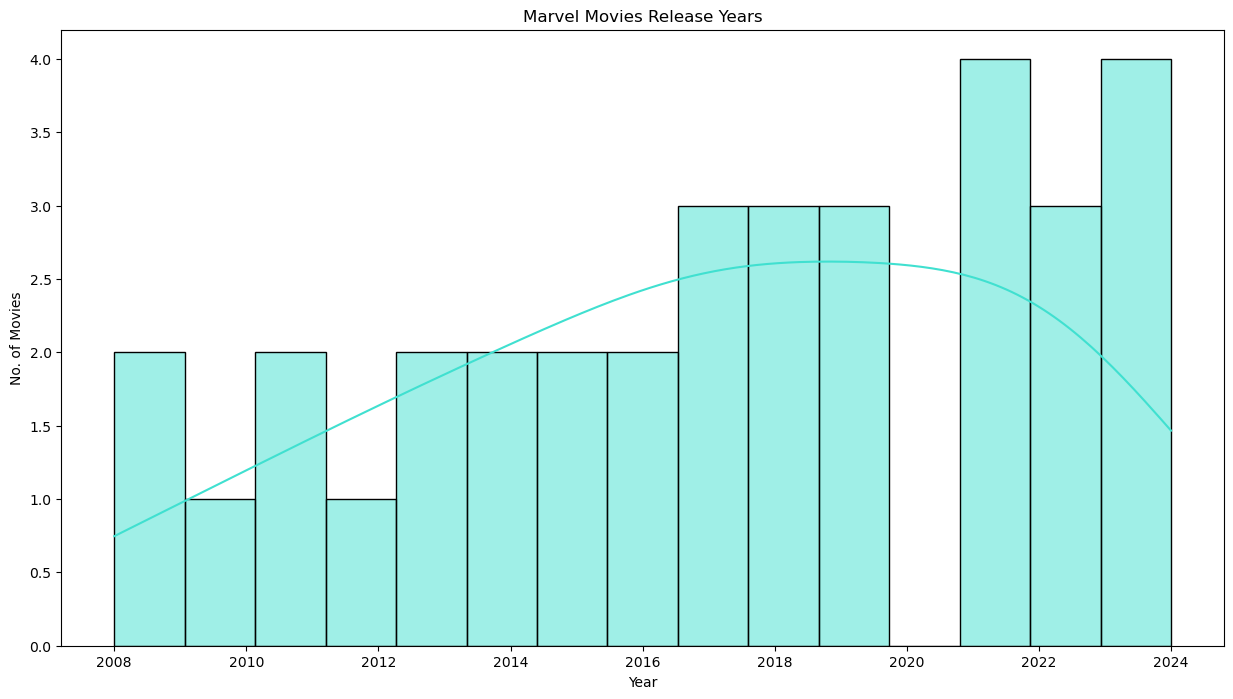

In [97]:
plt.figure(figsize=(15,8))
sns.histplot(df_mcu['Release Date'].dt.year, bins=15, kde=True, color='turquoise')
plt.title('Marvel Movies Release Years')
plt.xlabel('Year')
plt.ylabel('No. of Movies')
plt.show()

## Director's Influence

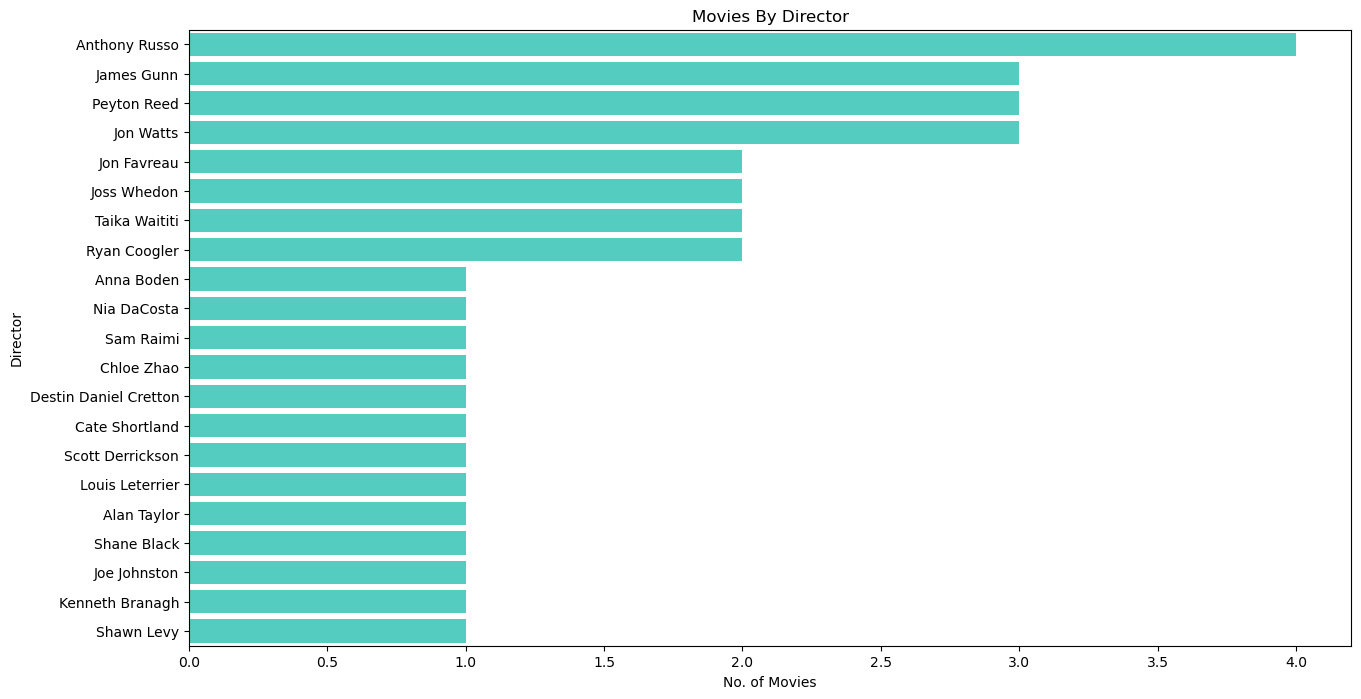

In [99]:
plt.figure(figsize=(15,8))
sns.countplot(y='Director (1)', data=df_mcu, color='turquoise', order=df_mcu['Director (1)'].value_counts().index)
plt.title('Movies By Director')
plt.xlabel('No. of Movies')
plt.ylabel('Director')
plt.show()

## Budget vs Gross

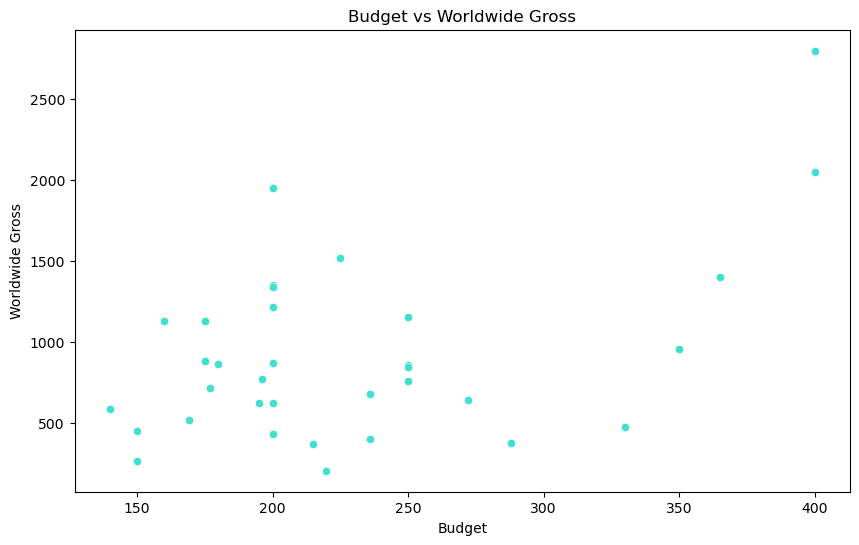

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Budget (in million $)', y='Worldwide Gross (in million $)', data=df_mcu, color='turquoise')
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross')
plt.show()

## Correlation Ratings

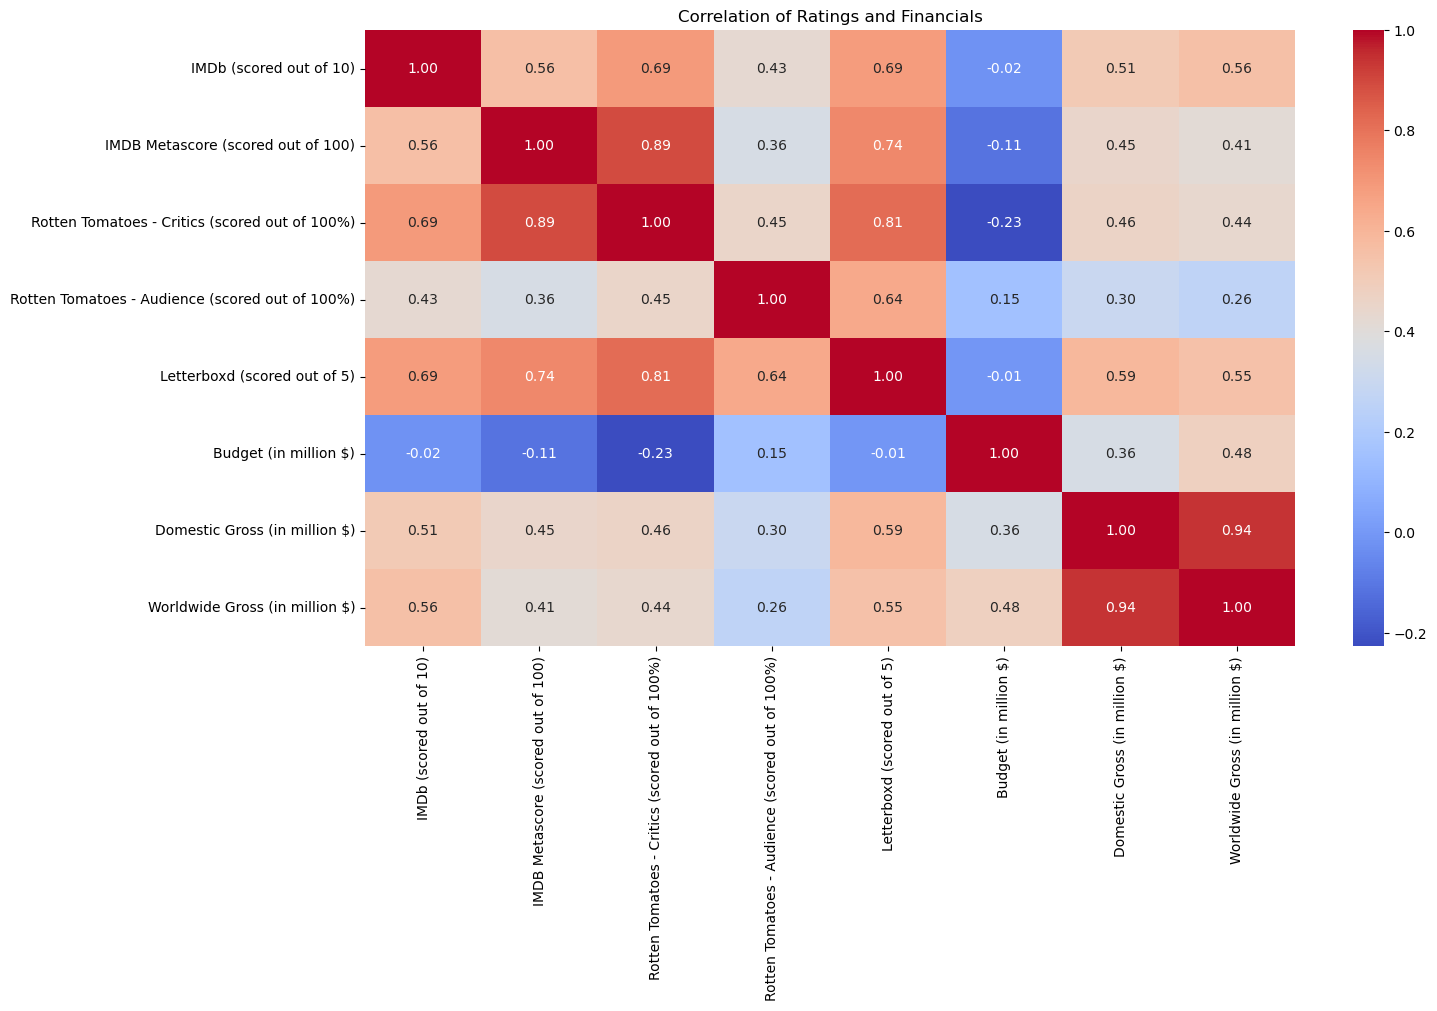

In [114]:
numeric_df = df_mcu.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Ratings and Financials')
plt.show()